In [6]:
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
import matplotlib
from matplotlib import pyplot as plt
plt.rc('font', size=50)          # controls default text sizes
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=40)    # legend fontsize
plt.rc('lines', markersize = 10)

matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 15, 10
plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.which'] = "both"
props = dict(boxstyle='round', alpha=0.01)

In [7]:
def rg(J,Dj,Nj,nj,K,w):
    if K == 1:
        return J**2 * nj * 2 * (Dj - 2*w) / ((Dj - 2*w)**2 - J**2 / 4)
    else:
        return J**2 * nj * (2 * (Dj - 2*w) - J * Nj * K / 2) / ((Dj - 2*w)**2 - J**2 / 4)

100%|██████████| 49/49 [00:01<00:00, 32.97it/s]


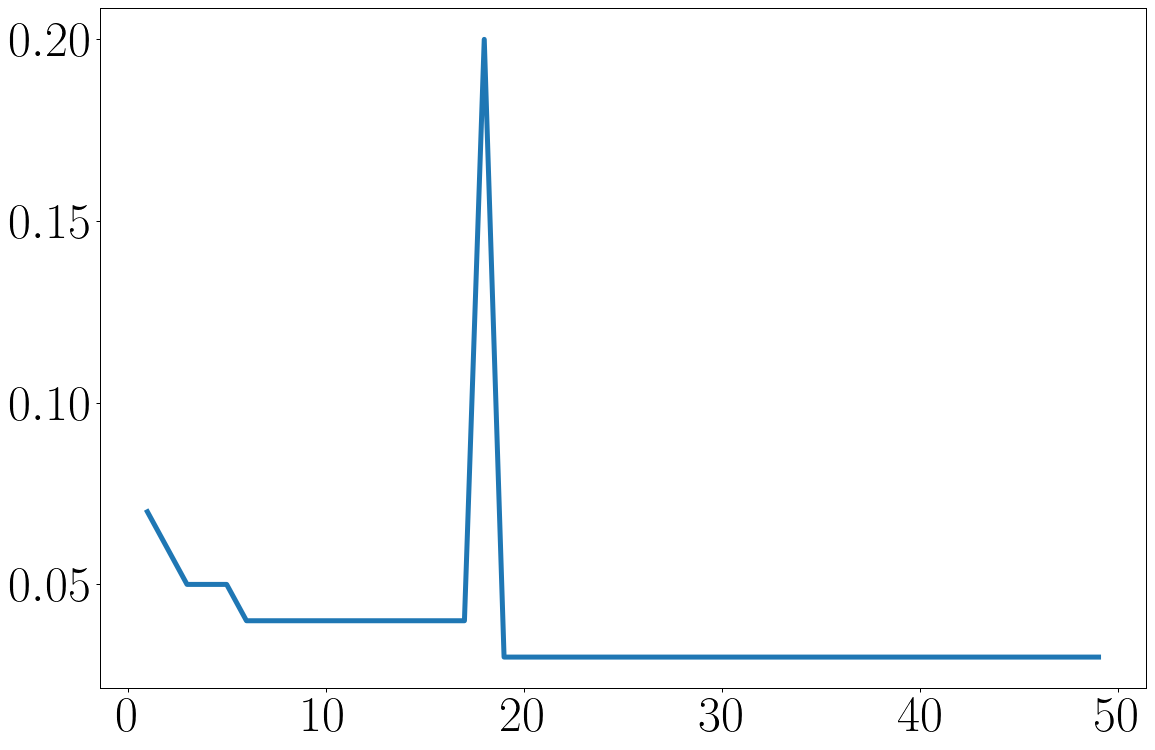

In [10]:
D0 = 50
deltaD = 0.01
D = np.arange(D0, 0, -deltaD)
rho = 1
K = 2

def get_min_rho(J):
    rho = 0
    while True:
        rho += 0.01
        nj = rho * deltaD
        for Dj in D:
            w = -Dj/2
            sig = (Dj - 2*w)**2 - J**2/4
            Nj = rho * Dj
            J += rg(J,Dj,Nj,nj,K,w)
            if sig * ((Dj - 2*w)**2 - J**2/4) <= 0:
                break
            elif J >= 8/(K*rho):
                return rho

J_range = np.arange(D0/50, D0, D0/50)
rho_min = list(tqdm(Pool().imap(get_min_rho, J_range), total=len(J_range)))
plt.plot(J_range, rho_min)
plt.show()

100%|██████████| 5/5 [10:37<00:00, 127.48s/it]


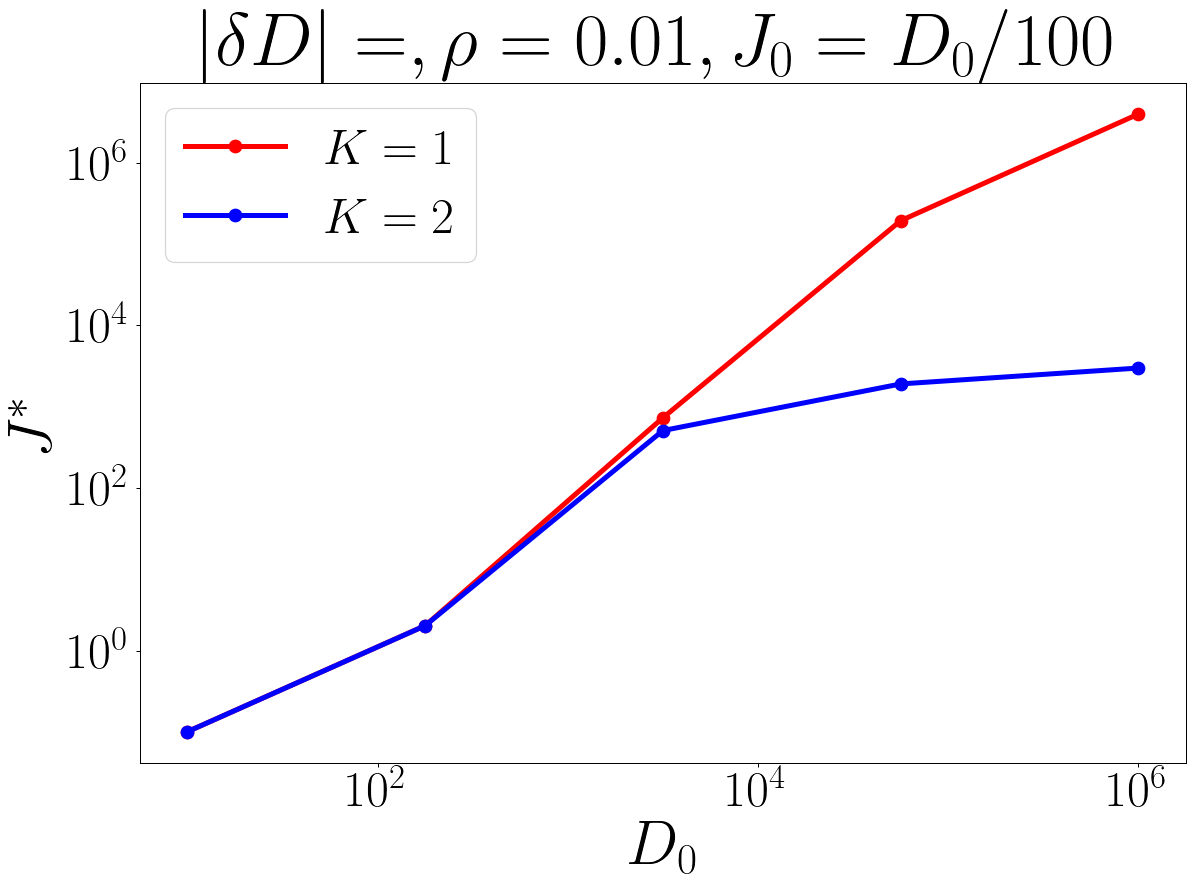

In [34]:
J_fp = [[],[]]
D_range = 10**np.linspace(1, 6, 5)
deltaD = 0.01
rho = 0.01
for D0 in tqdm(D_range):
    for K in [1,2]:
        J = D0/100
        D = np.arange(D0, 0, -deltaD)
        nj = rho * deltaD
        for Dj in D:
            w = -Dj/2
            sig = (Dj - 2*w)**2 - J**2/4
            Nj = rho * Dj
            J += rg(J,Dj,Nj,nj,K,w)
            if sig * ((Dj - 2*w)**2 - J**2/4) <= 0:
                break
        J_fp[min(K-1,1)].append(J)
plt.plot(D_range, J_fp[0], color="r", marker="o", label=r"$K=1$")
plt.plot(D_range, J_fp[1], color="b", marker="o", label=r"$K=2$")

plt.title(r"$|\delta D| = , \rho = {}, J_0 = D_0/100$".format(deltaD, rho))
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$D_0$")
plt.ylabel(r"$J^*$")
# plt.savefig("Jfp_vs_D.pdf", bbox_inches="tight")
plt.show()